# HSE 2021: Mathematical Methods for Data Analysis

## Homework 4

**Warning 1**: You have 3 weeks for this assignemnt.  **it is better to start early (!)**

**Warning 2**: it is critical to describe and explain what you are doing and why, use markdown cells


### Contents

#### Decision Trees - 7 points
* [Task 1](#task1) (0.5 points)
* [Task 2](#task2) (0.5 points)
* [Task 3](#task3) (2 points)
* [Task 4](#task4) (0.5 points)
* [Task 5](#task5) (0.5 points)
* [Task 6](#task6) (2 points)
* [Task 7](#task7) (0.5 points)
* [Task 8](#task8) (0.5 points)

#### Ensembles - 3 points
* [Task 1](#task2_1) (1 point)
* [Task 2](#task2_2) (0.7 points)
* [Task 3](#task2_3) (0.5 points)
* [Task 4](#task2_4) (0.7 points)
* [Task 5](#task2_5) (0.1 points)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = (11, 5)
%matplotlib inline

# Part 1. Decision Tree Regressor

In this task you will be implementing decision tree for the regression by hands. 

### Task 1 <a id="task1"></a> (0.5 points)

Implement the function `H()` which calculates impurity criterion. We will be training regression tree, therefore, impurity criterion will be variance.

* You cannot use loops
* If `y` is empty, the function should return 0

In [2]:
import numpy as np

def H(y):
    """
    Calculate impurity criterion
    
    Parameters
    ----------
    y : np.array
        array of objects target values in the node

    Returns
    -------
    H(R) : float
        Impurity in the node (measuread by variance)
    """
    if len(y) == 0:
        return 0
    yr = np.mean(y)
    return np.mean(np.power(y - yr,2))

In [3]:
# Test the function
assert np.allclose(H(np.array([4,2,2, 2])), 0.75)
assert np.allclose(H(np.array([])), 0.0)

### Task 2 <a id="task2"></a>  (0.5 points)

To find the best split in the node we need to calculate the cost function. Denote: 
- `R` all the object in the node
- `j` index of the feature selected for the split
- `t` threshold
- `R_l` and `R_r` objects in the left and right child nodes correspondingly

We get the following cost function:

$$
Q(R, j, t) =\frac{|R_\ell|}{|R|}H(R_\ell) + \frac{|R_r|}{|R|}H(R_r) \to \min_{j, t},
$$

Implement the function `Q`, which should calculate value of the cost function for a given feature and threshold.

In [4]:
def Q(X, y, j, t):
    """
    Calculate cost function
    Parameters
    ----------
    X : ndarray
        array of objects in the node 
    y : ndarray
        array of target values in the node 
    j : int
        feature index (column in X)
    t : float
        threshold

    Returns
    -------
    Q : float
        Value of the cost function
    """   
    R_l = y[X[:,j]<t]
    R_r = y[X[:,j]>=t]
    Q = len(R_l)/len(X)*H(R_l) + len(R_r)/len(X)*H(R_r)
    return Q

### Task 3 <a id="task3"></a>  (2 points)

Now, let's implement `MyDecisionTreeRegressor` class. More specifically, you need to implement the following methods:

- `best_split`
- `grow_tree`
- `get_prediction`

Read docstrings for more details. Do not forget to use function `Q` implemented above, when finding the `best_split`

In [5]:
class Node(object):
    """
    Class for a decision tree node.
    
    Parameters
    ----------
    right : Node() or None
        Right child
    right : Node() or None
        Left child
    threshold: float
        
    column: int
        
    depth: int
        
    prediction: float
        prediction of the target value in the node (average values calculated on a train dataset)
    is_terminal:bool
        indicates whether it is a terminal node (leaf) or not
    """    
    def __init__(self):        
        self.right = None
        self.left = None
        self.threshold = None
        self.column = None
        self.depth = None
        self.is_terminal = False
        self.prediction = None
        
    def __repr__(self):
        if self.is_terminal:
            node_desc = 'Pred: {:.2f}'.format(self.prediction)
        else:
            node_desc = 'Col {}, t {:.2f}, Pred: {:.2f}'.format(self.column, self.threshold, self.prediction)
        return node_desc

In [7]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class MyDecisionTreeRegressor(RegressorMixin, BaseEstimator):
    """
    Class for a Decision Tree Regressor.

    Parameters
    ----------
    max_depth : int
        Max depth of a decision tree.
    min_samples_split : int
        Minimal number of samples (objects) in a node to make a split.
    """ 
    def __init__(self, max_depth=3, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
            
    def best_split(self, X, y):
        """
        Find the best split in terms of Q of data in a given decision tree node. 
        Try all features and thresholds. 
        
        Parameters
        ----------
        X : ndarray, shape (n_objects, n_features)
            Objects in the parent node
        y : ndarray, shape (n_objects, )
            1D array with the object labels. 
            
        Returns
        -------
        best_split_column : int
            Index of the best split column
        best_threshold : float
            The best split condition.
        X_left : ndarray, shape (n_objects_l, n_features)
            Objects in the left child
        y_left : ndarray, shape (n_objects_l, )
            Objects labels in the left child. 
        X_right : ndarray, shape (n_objects_r, n_features)
            Objects in the right child
        y_right : ndarray, shape (n_objects_r, )
            Objects labels in the right child. 
        """
        
        # To store best split parameters
        best_split_column = None
        best_threshold = None
        # without splitting
        X_left = None
        X_right = None
        y_left = None
        y_right = None
        best_cost = H(y) 
        for i in range(len(X[0,:])):
            for j in range(len(X[:,0])):
                cost_tmp = Q(X,y,i,X[j,i])
                if(best_cost > cost_tmp):
                    best_cost = cost_tmp
                    best_split_column = i
                    best_threshold = X[j,i]
                    X_left = X[X[:,i] < X[j,i]]
                    X_right = X[X[:,i] >= X[j,i]]
                    y_left = y[X[:,i] < X[j,i]]
                    y_right = y[X[:,i] >= X[j,i]]
                            
        return best_split_column, best_threshold, X_left, y_left, X_right, y_right
    
    def is_terminal(self, node, y):
        """
        Check terminality conditions based on `max_depth` and `min_samples_split` parameters for a given node. 
        
        Parameters
        ----------
        node : Node, 
            
        y : ndarray, shape (n_objects, )
            Object labels. 
            
        Returns
        -------
        Is_termial : bool
            If True, node is terminal
        """
        if node.depth >= self.max_depth:    
            return True
        if len(y) < self.min_samples_split:   
            return True
        return False
        
    def grow_tree(self, node, X, y):
        """
        Reccurently grow the tree from the `node` using a `X` and `y` as a dataset:
         - check terminality conditions
         - find best split if node is not terminal
         - add child nodes to the node
         - call the function recursively for the added child nodes
        
        Parameters
        ----------
        node : Node() object
            Current node of the decision tree.
        X : ndarray, shape (n_objects, n_features)
            Objects 
        y : ndarray, shape (n_objects)
            Labels
        """
        
        if self.is_terminal(node, y):
            node.is_terminal =True
            return
        if np.all(y == y[0]):
            node.is_terminal =True
            return
            
        best_split_column, best_threshold, X_left, y_left, X_right, y_right = self.best_split(X,y)
        node_left = Node()
        node.column = best_split_column
        node.threshold = best_threshold
        node_left.depth = node.depth + 1
        node_left.prediction = np.mean(y_left)
        node.left = node_left
        self.grow_tree(node_left, X_left, y_left)
        
        node_right = Node()
        node_right.depth = node.depth + 1
        node_right.prediction = np.mean(y_right)
        node.right = node_right
        self.grow_tree(node_right, X_right, y_right)
        # YOUR CODE HERE
        

    def fit(self, X, y):
        """
        Fit the Decision Tree Regressor.
            
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            The input samples.
        y : ndarray, shape (n_samples,) or (n_samples, n_outputs)
            The target values.
        Returns
        -------
        self : object
            Returns self.
        """
        X, y = check_X_y(X, y, accept_sparse=False)
        self.is_fitted_ = True
        
        # Initialize the tree (root node)
        self.tree_ = Node()                             
        self.tree_.depth = 1                            
        self.tree_.prediction = np.mean(y)
        
        # Grow the tree
        self.grow_tree(self.tree_, X, y)
        return self        
    
    def get_prediction(self, node, x):
        """
        Get prediction for an object `x`
            - Return prediction of the `node` if it is terminal
            - Otherwise, recursively call the function to get predictions of the proper child
        
        Parameters
        ----------
        node : Node() object
            Current node of the decision tree.
        x : ndarray, shape (n_features,)
            Array of feature values of one object.
        Returns
        -------
        y_pred : float
            Prediction for an object x
        """
        # YOUR CODE HERE
        if node.is_terminal:
            return node.prediction
        if x[node.column] < node.threshold:
            y_pred = self.get_prediction(node.left, x)
        else:
            y_pred = self.get_prediction(node.right, x)
        
        
        return y_pred
    
    def predict(self, X):
        """ 
        Get prediction for each object in X
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            The input samples.
        Returns
        -------
        y : ndarray, shape (n_samples,)
            Returns predictions.
        """
        # Check input and that `fit` had been called
        X = check_array(X, accept_sparse=False)
        check_is_fitted(self, 'is_fitted_')
        
        # Get predictions
        y_predicted = []
        for x in X:
            y_curr = self.get_prediction(self.tree_, x)
            y_predicted.append(y_curr)
        return np.array(y_predicted)

In [8]:
# check yourself
from sklearn.utils.estimator_checks import check_estimator

check_estimator(MyDecisionTreeRegressor())

C:\Users\f.deryabin\Anaconda3\lib\site-packages\sklearn\utils\estimator_checks.py:3005: FutureWarning: As of scikit-learn 0.23, estimators should expose a n_features_in_ attribute, unless the 'no_validation' tag is True. This attribute should be equal to the number of features passed to the fit method. An error will be raised from version 0.25 when calling check_estimator(). See SLEP010: https://scikit-learn-enhancement-proposals.readthedocs.io/en/latest/slep010/proposal.html
  warnings.warn(
C:\Users\f.deryabin\Anaconda3\lib\site-packages\sklearn\utils\estimator_checks.py:3047: FutureWarning: As of scikit-learn 0.23, estimators should have a 'requires_y' tag set to the appropriate value. The default value of the tag is False. An error will be raised from version 0.25 when calling check_estimator() if the tag isn't properly set.
  warnings.warn(warning_msg, FutureWarning)


### Task 4 <a id="task4"></a>  (0.5 points)

Load boston dataset and split it on the train ($70\%$) and test ($30\%$). Fit Decision Tree of depth 1 and make the following plot:

- Scatter plot of the traning points (selected for split feature on the x-axis, target variable on the y-axis)
- Fitted model 

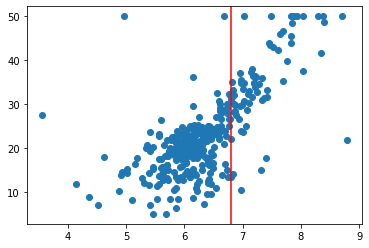

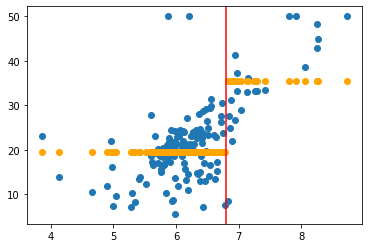

In [11]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# YOUR CODE HERE
data = load_boston()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

mdtr = MyDecisionTreeRegressor(2)
mdtr.fit(X_train, y_train)


plt.scatter(X_train[:,mdtr.tree_.column], y_train)
plt.axvline(mdtr.tree_.threshold, color = 'Red')
plt.show()

y_p = mdtr.predict(X_test)


plt.scatter(X_test[:,mdtr.tree_.column], y_test)
plt.scatter(X_test[:,mdtr.tree_.column], y_p, color = 'orange')

plt.axvline(mdtr.tree_.threshold, color = 'Red')

### Task 5 <a id="task5"></a>  (0.5 points)

Keep working with boston dataset. 
- Use `GridSearchCV` to find the best hyperparameters (`max_depth` and `min_samples_split`) on 5-Fold cross-validation
- Train the model with the best set of hyperparameters on the whole train dataset. 
- Report `RMSE` on test dataset and hyperparameters of the best estimator. 

In [12]:
# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
params = {"max_depth":[2,4,6,8,10],'min_samples_split':[3,5,8,9]}

mytree = MyDecisionTreeRegressor()
grid_search = GridSearchCV(mytree, params, cv = 5, scoring = 'neg_root_mean_squared_error')
grid_search.fit(X_train,y_train)
print(grid_search.best_params_, grid_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=2, min_samples_split=3 ................................
[CV] ... max_depth=2, min_samples_split=3, score=-6.562, total=   0.2s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[CV] max_depth=2, min_samples_split=3 ................................
[CV] ... max_depth=2, min_samples_split=3, score=-6.536, total=   0.2s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[CV] max_depth=2, min_samples_split=3 ................................
[CV] ... max_depth=2, min_samples_split=3, score=-7.295, total=   0.2s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[CV] max_depth=2, min_samples_split=3 ................................
[CV] ... max_depth=2, min_samples_split=3, score=-8.451, total=   0.1s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elaps

[CV] ... max_depth=4, min_samples_split=9, score=-5.396, total=   0.5s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   12.5s remaining:    0.0s
[CV] max_depth=4, min_samples_split=9 ................................
[CV] ... max_depth=4, min_samples_split=9, score=-7.689, total=   0.5s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:   13.0s remaining:    0.0s
[CV] max_depth=4, min_samples_split=9 ................................
[CV] ... max_depth=4, min_samples_split=9, score=-5.673, total=   0.5s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:   13.5s remaining:    0.0s
[CV] max_depth=4, min_samples_split=9 ................................
[CV] ... max_depth=4, min_samples_split=9, score=-5.893, total=   0.5s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   13.9s remaining:    0.0s
[CV] max_depth=6, min_samples_split=3 ................................
[CV] ... max_depth=6, min_samples_split=3, score=-3.362, total=   0.7s
[Parallel(n_jobs=1)]: Done  41 out of  41

[CV] ... max_depth=8, min_samples_split=8, score=-5.265, total=   0.9s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:   40.8s remaining:    0.0s
[CV] max_depth=8, min_samples_split=8 ................................
[CV] ... max_depth=8, min_samples_split=8, score=-5.675, total=   0.9s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   41.7s remaining:    0.0s
[CV] max_depth=8, min_samples_split=9 ................................
[CV] ... max_depth=8, min_samples_split=9, score=-3.313, total=   1.0s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:   42.7s remaining:    0.0s
[CV] max_depth=8, min_samples_split=9 ................................
[CV] ... max_depth=8, min_samples_split=9, score=-4.819, total=   1.0s
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:   43.7s remaining:    0.0s
[CV] max_depth=8, min_samples_split=9 ................................
[CV] ... max_depth=8, min_samples_split=9, score=-7.665, total=   1.0s
[Parallel(n_jobs=1)]: Done  78 out of  78

### Task 6 <a id="task6"></a>  (2 points)

Recall definition of bias and variance:
$$
\text{Bias}^2 = \mathbb{E}_{p(x, y)} \left[  (f(x) - \mathbb{E}_{\mathbb{X}}a_{\mathbb{X}}(x))^2 \right] \\
\text{Variance} = \mathbb{E}_{p(x, y)} \left[  \mathbb{V}_{\mathbb{X}}( a_{\mathbb{X}}(x))  \right]
$$

We wil now use use the following algorithm to estimate bias and variance:

1. Use bootsrap to create `n_iter` samples from the original dataset: $X_1, \dots, X_{n_iter}$
2. For each bootstrapped sample define out-of-bag (OOB) sample $Z_1, \dots, Z_{n_iter}$, which contain all the observations, which did not appear in the corresponding boostraped sample
3. Fit the model on $X_i$s and compute predictions on $Z_i$s
4. For a given *object* $n$:
     - bias^2: squared difference between true value $y_n$ and average prediction (average over the algorithms, for which $n$ was in OOB)
     - variance: variance of the prediction (predictions of the algorithms, for which $n$ was in OOB)
5. Average bias^2 and variance over all the points
    
**Implement `get_bias_variance` function, using the algorithm above**

*Note:*  You can only use 1 loop (for bootsrap iterations). All other operations should be vectorized. 

In [14]:
def get_bias_variance(estimator, x, y, n_iter):
    """ 
    Calculate bias and variance of the `estimator`. Using a given dataset and bootstrap with `n_iter` samples. 

    Parameters
    ----------
    x : ndarray, shape (n_samples, n_features)
        The input samples.
    y : ndarray, shape (n_samples, n_features)
        The input samples.
    n_iter: int
        Number of samples in 
    Returns
    -------
    bias2 : float, 
        Estiamted squared bias
    variance : float, 
        Estiamted variance
    """
    # YOUR CODE HERE
    varr = np.array([])
    bias2 = np.array([])
    pred = np.empty((len(x), 1))
    pred [:] = np.nan
    for i in range(n_iter):

        bootstraps_indexes = np.random.choice(len(y),len(y))
        rng = np.arange(len(y))
        no_brutstrap_indexes = rng[~np.isin(rng,bootstraps_indexes)]
        
        estimator.fit(x[bootstraps_indexes,:],y[bootstraps_indexes])
        
        y_pred = estimator.predict(x[no_brutstrap_indexes, :])
        
        tmp = np.empty(len(x))
        tmp[:] = np.NaN
        np.put(tmp, no_brutstrap_indexes, y_pred)
        
        pred = np.column_stack((pred, tmp))
    pred = np.delete(pred, 1, axis = 1)
    var = np.nanvar(pred, axis = 1)
    bias = np.square(y - np.nanmean(pred, axis = 1))
    return np.nanmean(bias), np.nanmean(var)

    

In [15]:
# Test
estimator = MyDecisionTreeRegressor(max_depth=8, min_samples_split=15)

get_bias_variance(estimator, X_train, y_train, 10)

<ipython-input-14-f2edab789d4a>:41: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = np.nanvar(pred, axis = 1)
<ipython-input-14-f2edab789d4a>:42: RuntimeWarning: Mean of empty slice
  bias = np.square(y - np.nanmean(pred, axis = 1))


(19.611659820165986, 7.994894716081735)

### Task 7 <a id="task7"></a>  (0.5 points)

Compute bias and variance for the trees of different depths. Plot how bias and variance change as depth increases. 

Comment on what you observe, how does your result correspond to what we have discussed in class?

<ipython-input-14-f2edab789d4a>:41: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = np.nanvar(pred, axis = 1)
<ipython-input-14-f2edab789d4a>:42: RuntimeWarning: Mean of empty slice
  bias = np.square(y - np.nanmean(pred, axis = 1))
<ipython-input-14-f2edab789d4a>:41: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = np.nanvar(pred, axis = 1)
<ipython-input-14-f2edab789d4a>:42: RuntimeWarning: Mean of empty slice
  bias = np.square(y - np.nanmean(pred, axis = 1))
<ipython-input-14-f2edab789d4a>:41: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = np.nanvar(pred, axis = 1)
<ipython-input-14-f2edab789d4a>:42: RuntimeWarning: Mean of empty slice
  bias = np.square(y - np.nanmean(pred, axis = 1))
<ipython-input-14-f2edab789d4a>:41: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = np.nanvar(pred, axis = 1)
<ipython-input-14-f2edab789d4a>:42: RuntimeWarning: Mean of empty slice
  bias = np.square(y - np.nanmean(pred, axis = 1))
<ipython-input-14-f2edab

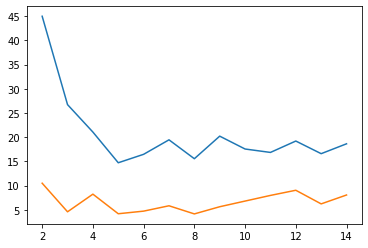

In [16]:
# YOUR CODE HERE
x = []
biases = []
varss = []

for i in range(2,15):
    x.append(i)
    est = MyDecisionTreeRegressor(max_depth=i, min_samples_split = 10)
    bias,var = get_bias_variance(est, X_train, y_train, 8)
    biases.append(bias)
    varss.append(var)
plt.plot(x,biases)
plt.plot(x,varss)
plt.show()
    

``` Как и ожидалось, bias2 убывает в зависимости от глубины дерева. Дисперсия же должна, вроде как возрастать, но не возрастает почти. Мне кажется, тут дела в том, что мало глубин деревьев изучил, и что на больших глубинах var повышается. ```

### Task 8 <a id="task8"></a>  (0.5 points)

Let's try to reduce variance with bagging. Use `sklearn.ensemble.BaggingRegressor` to get an ensemble and compute its bias and variance. 

Answer the following questions:
 - How bagging should affect bias and variance in theory?
 - How bias and variance change (if they change) compared to an individual tree in you experiments? 
 - Do your results align with the theory? Why?

In [17]:
from sklearn.ensemble import BaggingRegressor

bagging = BaggingRegressor(base_estimator=MyDecisionTreeRegressor(max_depth=8, min_samples_split=15), n_estimators=10, random_state=42)
get_bias_variance(bagging, X_train, y_train, n_iter=10)

<ipython-input-14-f2edab789d4a>:41: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = np.nanvar(pred, axis = 1)
<ipython-input-14-f2edab789d4a>:42: RuntimeWarning: Mean of empty slice
  bias = np.square(y - np.nanmean(pred, axis = 1))


(14.914015112714406, 2.3633103437430556)

```В целом, с теорией всё сошлось```

# Part 2. More Ensembles

In this part we will be working with [Thyroid Disease Data Set](https://archive.ics.uci.edu/ml/datasets/thyroid+disease) to solve a classification task. 

In [19]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
df = pd.read_csv('thyroid_disease.csv')

le = LabelEncoder()
y = le.fit_transform(df['Class'])
X = df.drop('Class', axis=1)
X.head(5)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source
0,41.0,F,f,f,f,f,f,f,f,f,...,2.5,t,125.0,t,1.14,t,109.0,f,NaN,SVHC
1,23.0,F,f,f,f,f,f,f,f,f,...,2.0,t,102.0,f,NaN,f,NaN,f,NaN,other
2,46.0,M,f,f,f,f,f,f,f,f,...,NaN,t,109.0,t,0.91,t,120.0,f,NaN,other
3,70.0,F,t,f,f,f,f,f,f,f,...,1.9,t,175.0,f,NaN,f,NaN,f,NaN,other
4,70.0,F,f,f,f,f,f,f,f,f,...,1.2,t,61.0,t,0.87,t,70.0,f,NaN,SVI


### Task 1 <a id="task2_1"></a> (1 point)

Let's start with data preprocessing. 

0. Drop columns, which are not usefull (e.g. a lot of missing values). Motivate your choice. 
1. Split dataset into train and test
2. You've probably noticed that we have both categorical and numerical columns. Here is what you need to do with them:
    - Categorical: Fill missing values and apply one-hot-encoding
    - Numeric: Fill missing values
    
Use `ColumnTranformer` to define a single transformer for all the columns in the dataset. It takes as input a list of tuples

```
ColumnTransformer([
    ('name1', transorm1, column_names1),
    ('name2', transorm2, column_names2)
])
```

Pay attention to an argument `remainder='passthrough'`. [Here](https://scikit-learn.org/stable/modules/compose.html#column-transformer) you can find some examples of how to use column transformer. 
    
Since we want to apply 2 transformations to categorical feature, it is very convenient to combine them into a `Pipeline`:

```
double_tranform = make_pipeline(
                        transform_1,
                        transform_2
                        )
```

P.S. Choose your favourite way to fill missing values. 

*Hint* Categorical column usually have `dtype = 'object'`. This may help to obtain list of categorical and numerical columns on the dataset. 

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


# YOUR CODE HERE
# define column_transformer 
columns = X.columns[X.isna().mean() > 0.25].to_list()
print(columns)
X = X.drop(columns = columns)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
cat_prep = Pipeline(steps = [('fillna', SimpleImputer(strategy='most_frequent')),('encode', OneHotEncoder())])
column_transformer = ColumnTransformer(transformers=[('num', SimpleImputer(strategy='most_frequent'), make_column_selector(dtype_include = 'float')),('cat',cat_prep,make_column_selector(dtype_include='object'))], remainder='passthrough')
# Transform the data
X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

['TBG']


### Task 2 <a id="task2_2"></a> (0.7 points)

Fit and compare 5 different models (use sklearn): Gradient Boosting, Random Forest, Decision Tree, SVM, Logitics Regression
    
* Choose one classification metric and justify your choice .
* Compare the models using score on cross validation. Mind the class balance when choosing the cross validation. (You can read more about different CV strategies [here](https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold))
* Which model has the best performance? Which models overfit or underfit?

In [23]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()
lr = LogisticRegression()

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import roc_auc_score
cv = StratifiedKFold(n_splits= 3)
score = {}
models = [gbc, rfc,dtc,svc,lr]
lables = ['GradientBoostingClassifier', 'RandomForestClassifier','DecisionTreeClassifier','SVC','LogisticRegression']
# for i in range(len(lables)):
#     score[lables[i]] = cross_validate(models[i], X_train, y_train, scoring='recall', cv= cv, return_estimator=True)
# for key in score:
#     print(key, score[key]['test_score'].mean(), recall_score(y_test, score[key]['estimator'][0].predict(X_test)))
tmp = cross_validate(gbc, X_train, y_train, scoring='roc_auc', cv= cv, return_estimator=True)
print('gbc', tmp['test_score'].mean(), roc_auc_score(y_test, tmp['estimator'][0].predict(X_test)))
tmp = cross_validate(rfc, X_train, y_train, scoring='roc_auc', cv= cv, return_estimator=True)
print('rfc', tmp['test_score'].mean(), roc_auc_score(y_test, tmp['estimator'][0].predict(X_test)))
tmp = cross_validate(dtc, X_train, y_train, scoring='roc_auc', cv= cv, return_estimator=True)
print('dtc', tmp['test_score'].mean(), roc_auc_score(y_test, tmp['estimator'][0].predict(X_test)))
tmp = cross_validate(svc, X_train, y_train, scoring='roc_auc', cv= cv, return_estimator=True)
print('svc', tmp['test_score'].mean(), roc_auc_score(y_test, tmp['estimator'][0].predict(X_test)))
tmp = cross_validate(lr, X_train, y_train, scoring='roc_auc', cv= cv, return_estimator=True)
print('lr', tmp['test_score'].mean(), roc_auc_score(y_test, tmp['estimator'][0].predict(X_test)))

gbc 0.9905527741934138 0.9302245488359278
rfc 0.9905104850502707 0.8993050772221457
dtc 0.9271131273724543 0.9182930002602134
svc 0.960281304543717 0.5
lr 0.9385601329592034 0.815937303883302


C:\Users\f.deryabin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\f.deryabin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

```Наибольшие отклонения у SVC. Она переобучилась. У остальных все показатели более или менее совпадают, причем находятся на довольно хорошем уровне, а значит модли хорошие```

### Task 3 <a id="task2_3"></a> (0.5 points)

More Gradient Boosting. Choose one of the tree popular boosting implementations (xgboost, lightgbm, catboost). Select hyperparameters (number of trees, learning rate, depth) on cross-validation and compare with the methods from the previous task. 



In [ ]:
# YOUR CODE HERE

```your comments here```

### Task 4 <a id="task2_4"></a> (0.7 points)

Now let's train more fancy ensembles:

* Bagging with decision trees as base estimators
* Bagging with gradient boosting (with large amount of trees, >100) as base estimators
* [Voting classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) 
* [Stacking Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier) with Logistic Regression as a final model
* [Stacking Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier) with Gradeint Boosting as a final model


If not stated in the task, feel free to tune / choose hyperparameters and base models.

Answer the questions:
* Which model has the best performance?
* Does bagging reduce overfiting of the gradient boosting with large amount of trees? 
* What is the difference between voting and staking? 

In [ ]:
# YOUR CODE HERE

```your comments here```

### Task 5 <a id="task2_5"></a> (0.1 points)

Report the test score for the best model, that you were able to train. 

In [ ]:
# YOUR CODE HERE